In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

In [2]:
df = pd.read_csv('soccer17.csv')

In [3]:
df['All_Goals'] = df.FTHG + df.FTAG
df['H1_Goals'] = df.HTHG + df.HTAG
df['H2_Goals'] = df['All_Goals'] - df['H1_Goals']
X = np.linspace(0, 10)

# 2a



## i. Model Selection
$$ A_1, ..., A_{7304} \stackrel{iid}{\sim} \mathcal{N}(\mu_A, \sigma^2_A) \text{ where } A_i \text{ represents all goals scored in a single game } i$$



## ii. Histogram

Text(0.5, 1.0, 'All Goals')

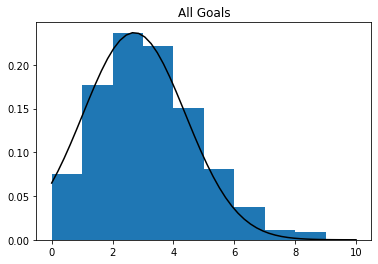

In [4]:
mu, sigma = norm.fit(df['All_Goals'])
plt.hist(df['All_Goals'], bins=np.arange(0, 10), density=True)
plt.plot(X, norm.pdf(X, mu, sigma), color='black')
plt.title('All Goals')

# 2b

## i. Model Selection
$$ H_1, ..., H_{7304} \stackrel{iid}{\sim} \mathcal{N}(\mu_H, \sigma^2_H) \text{ where } H_i \text{ represents all first half goals scored in a single game } i $$

## ii. Histogram



Text(0.5, 1.0, 'H1 Goals')

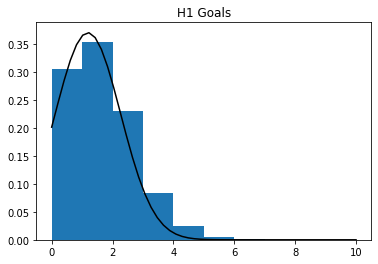

In [5]:
mu, sigma = norm.fit(df['H1_Goals'])
plt.hist(df['H1_Goals'], bins=np.arange(0, 10), density=True)
plt.plot(X, norm.pdf(X, mu, sigma), color='black' )
plt.title('H1 Goals')

# 2c


## i. Model Selection
$$ I_1, ..., I_{7304} \stackrel{iid}{\sim} \mathcal{N}(\mu_I, \sigma^2_I) \text{ where } I_i \text{ represents all second half goals scored in a single game } i$$

## ii. Histogram



Text(0.5, 1.0, 'H2 Goals')

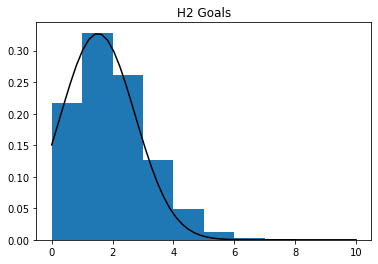

In [6]:
mu, sigma = norm.fit(df['H2_Goals'])
plt.hist(df.H2_Goals, bins=np.arange(0, 10), density=True)
plt.plot(X, norm.pdf(X, mu, sigma), color='black')
plt.title('H2 Goals')

# 2d

In [7]:
df2 = pd.DataFrame()
df2['Num_Games'] = df.groupby('Div').count()['All_Goals']
df2['Avg_Goals'] = df.groupby('Div').mean()['All_Goals']

df2.reset_index().sort_values(by='Avg_Goals', ascending=False)

,Div,Num_Games,Avg_Goals
0,Bundesliga,1224,2.811275
2,La_Liga,1520,2.759211
4,Serie_A,1520,2.725658
1,EPL,1520,2.686184
3,Ligue_1,1520,2.588158


# 2e

In [8]:
epsilon = 0.04
df4 = df.loc[df.All_Goals == 4]
fgg = df4.loc[(np.abs(df4.pH - df4.pA) < epsilon)]

In [9]:
prob_draw =  math.factorial(4)/(math.factorial(2) * math.factorial(2)) * (0.5)**2 * (0.5)**2
exp_draws = len(fgg) * prob_draw
draws = len(fgg.loc[fgg.FTHG == fgg.FTAG])
sigma = np.sqrt(0.375*0.625*len(fgg))

t = (draws-exp_draws)/sigma
p = 1 - norm.cdf(t)
print('p-value = {}'.format(p))

p-value = 0.007348710885011767


Our null hypothesis states that there is no "comeback tendency" within the dataset provided

Using an epsilon of $\epsilon = 0.04$, we were able to obtain a statistically significant p-value meaning that we reject the null hypothesis. This means that there is empirical evidence that suggests that a "comeback tendency" exists.